In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
import time


In [ ]:
data = pd.read_csv('/content/Clicked Ads Dataset.csv')

In [ ]:
data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


In [ ]:
data.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


1. Buat analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak(Hint: Perhatikan distribusi pada setiap kolom pada dataset)
2. Buatlah bivariate analysis pada variable yang telah diteliti pada univatriate analysis (Hint:Perhatikan hubungan antar kolom pada dataset)
3. Buatlah korelasi antar kolom dan lakukan multivariate analysis (Hint: Carilah hubungan antar kolom yang memiliki nilai korelasi yang tinggi)

##EDA

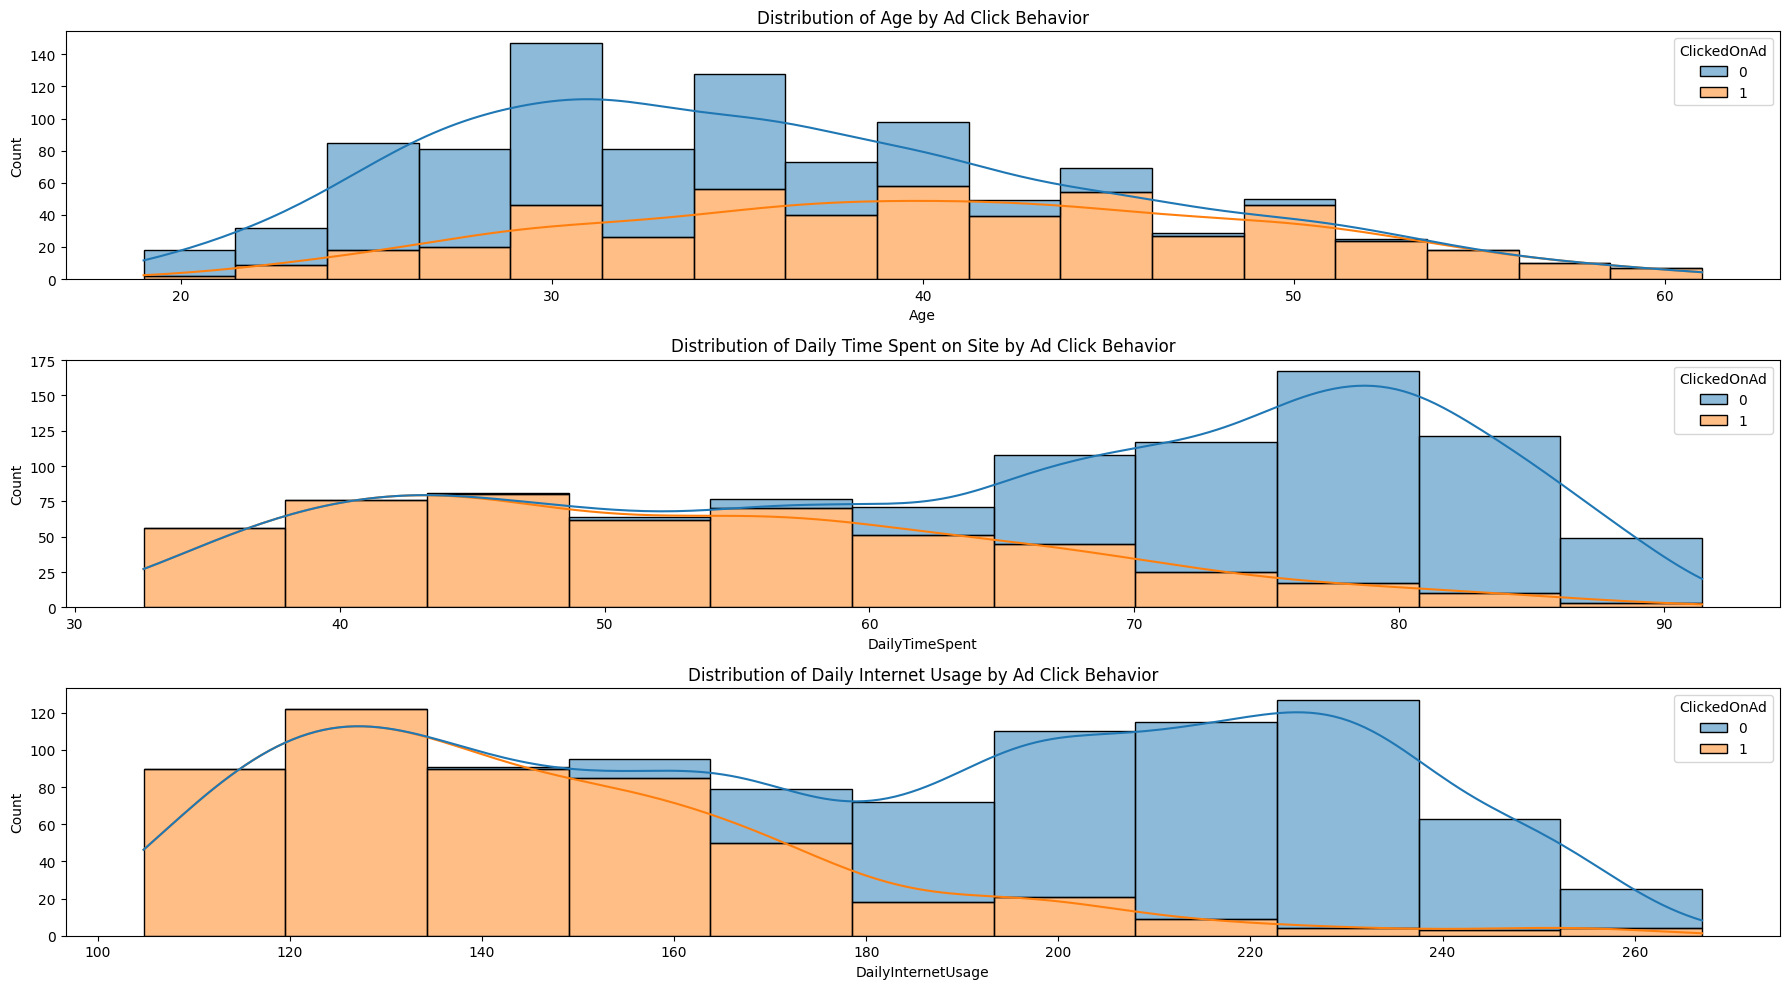

In [ ]:
# Mengubah nama kolom
data.rename(columns={
    'Age': 'Age',
    'Daily Time Spent on Site': 'DailyTimeSpent',
    'Daily Internet Usage': 'DailyInternetUsage',
    'Clicked on Ad': 'ClickedOnAd'
}, inplace=True)

# Ubah Yes = 1 dan No = 0
data['ClickedOnAd'] = data['ClickedOnAd'].apply(lambda x: 1 if x == 'Yes' else 0)

# plot size
plt.figure(figsize=(18, 10))

# Univariate Analysis for Age
plt.subplot(3, 1, 1)
sns.histplot(data=data, x='Age', hue='ClickedOnAd', kde=True, multiple="stack")
plt.title("Distribution of Age by Ad Click Behavior")

# Univariate Analysis for Daily Time Spent on Site
plt.subplot(3, 1, 2)
sns.histplot(data=data, x='DailyTimeSpent', hue='ClickedOnAd', kde=True, multiple="stack")
plt.title("Distribution of Daily Time Spent on Site by Ad Click Behavior")

# Univariate Analysis for Daily Internet Usage
plt.subplot(3, 1, 3)
sns.histplot(data=data, x='DailyInternetUsage', hue='ClickedOnAd', kde=True, multiple="stack")
plt.title("Distribution of Daily Internet Usage by Ad Click Behavior")

plt.tight_layout()
plt.show()

1. Distribusi Umur: Grafik menunjukkan bahwa pengguna yang lebih tua cenderung lebih sering mengklik iklan dibandingkan pengguna yang lebih muda. Terdapat distribusi yang lebih padat di rentang usia tertentu untuk pengguna yang tidak mengklik iklan.

2. Waktu Harian yang Dihabiskan di Situs: Pengguna dengan waktu yang lebih sedikit di situs tampak lebih mungkin mengklik iklan dibandingkan mereka yang menghabiskan lebih banyak waktu di situs. Distribusi ini mengindikasikan bahwa pengguna yang hanya mengunjungi sebentar lebih rentan terhadap klik iklan.

3. Penggunaan Internet Harian: Terlihat bahwa pengguna dengan penggunaan internet harian yang lebih rendah cenderung lebih sering mengklik iklan. Sementara itu, pengguna dengan penggunaan internet harian lebih tinggi sebagian besar tidak mengklik iklan.

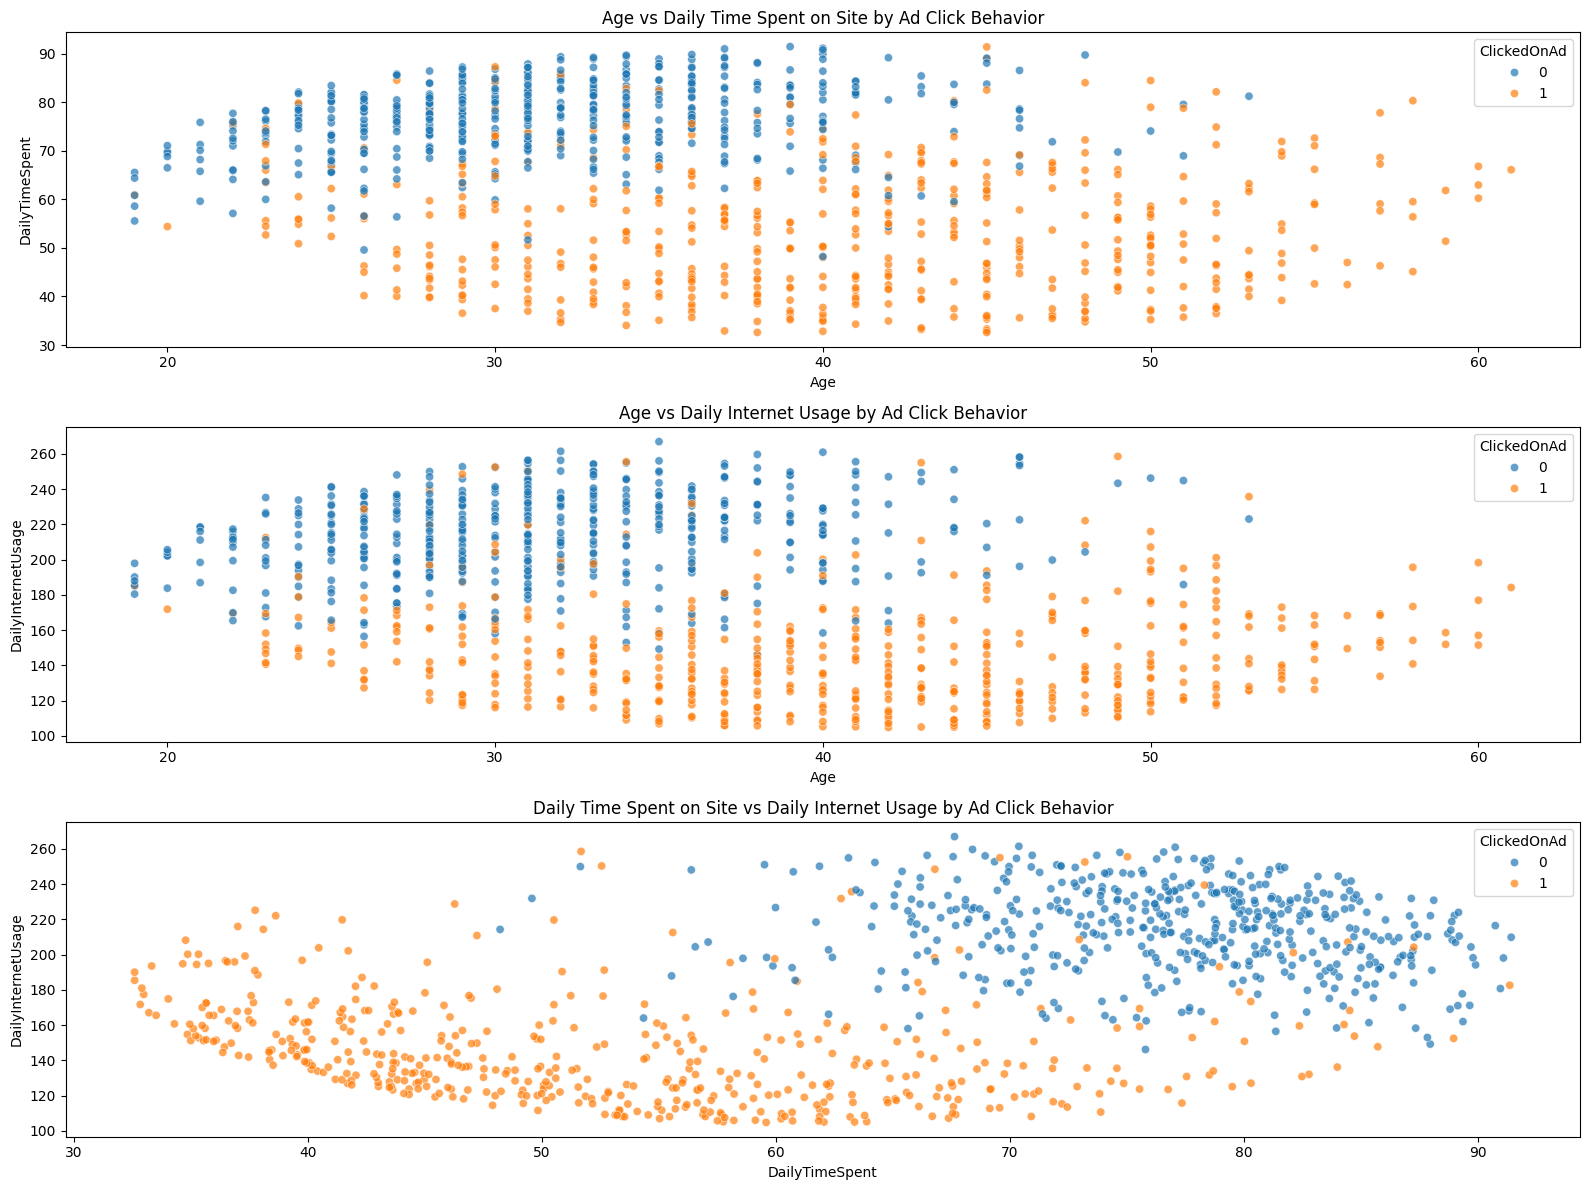

In [ ]:
plt.figure(figsize=(16, 12))

# Scatter plot for Age vs Daily Time Spent on Site, separated by ClickedOnAd
plt.subplot(3, 1, 1)
sns.scatterplot(data=data, x='Age', y='DailyTimeSpent', hue='ClickedOnAd', alpha=0.7)
plt.title("Age vs Daily Time Spent on Site by Ad Click Behavior")

# Scatter plot for Age vs Daily Internet Usage, separated by ClickedOnAd
plt.subplot(3, 1, 2)
sns.scatterplot(data=data, x='Age', y='DailyInternetUsage', hue='ClickedOnAd', alpha=0.7)
plt.title("Age vs Daily Internet Usage by Ad Click Behavior")

# Scatter plot for Daily Time Spent on Site vs Daily Internet Usage, separated by ClickedOnAd
plt.subplot(3, 1, 3)
sns.scatterplot(data=data, x='DailyTimeSpent', y='DailyInternetUsage', hue='ClickedOnAd', alpha=0.7)
plt.title("Daily Time Spent on Site vs Daily Internet Usage by Ad Click Behavior")

plt.tight_layout()
plt.show()

1. Umur vs Daily Time Spent on Site: Grafik menunjukkan hubungan antara umur pengguna dan waktu harian yang mereka habiskan di situs, dengan perbedaan berdasarkan klik iklan. Pengguna yang lebih tua dengan waktu lebih sedikit di situs tampak lebih cenderung mengklik iklan, sementara pengguna yang lebih muda dan menghabiskan lebih banyak waktu di situs jarang mengklik iklan.

2. Umur vs Daily Internet Usage: Terdapat korelasi serupa dengan pengguna yang lebih tua dan penggunaan internet harian lebih rendah yang lebih sering mengklik iklan. Sebaliknya, pengguna yang lebih muda dengan penggunaan internet lebih tinggi lebih jarang mengklik iklan.

3. Waktu Harian di Situs vs Daily Internet Usage: Grafik ini memperlihatkan pola antara waktu di situs dan total penggunaan internet. Pengguna yang menghabiskan lebih sedikit waktu di situs tetapi dengan penggunaan internet harian yang moderat hingga tinggi tampaknya lebih mungkin mengklik iklan.

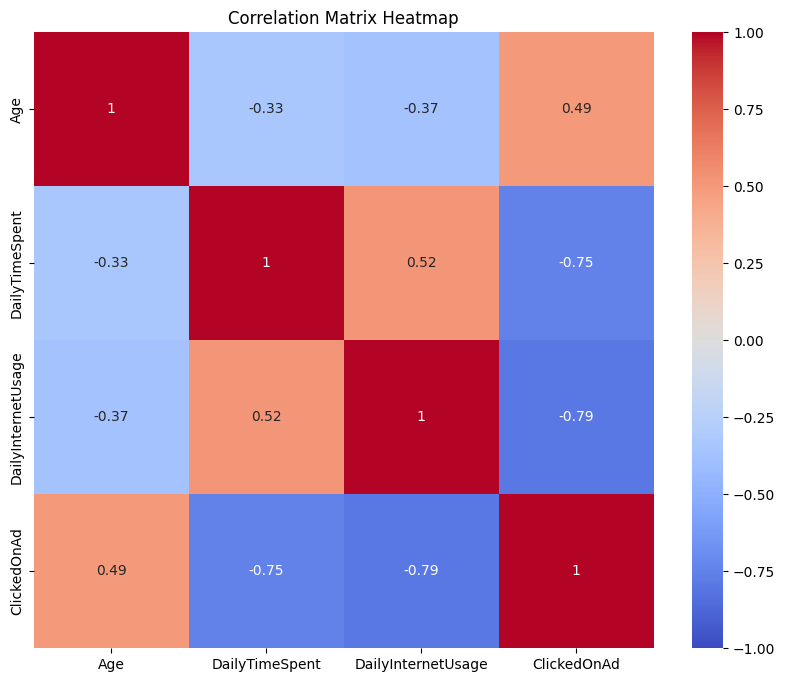

,Age,DailyTimeSpent,DailyInternetUsage,ClickedOnAd
Age,1.000000,-0.331424,-0.370481,0.492531
DailyTimeSpent,-0.331424,1.000000,0.518294,-0.746514
DailyInternetUsage,-0.370481,0.518294,1.000000,-0.789693
ClickedOnAd,0.492531,-0.746514,-0.789693,1.000000


In [ ]:
# Calculate the correlation matrix for the numerical columns
correlation_matrix = data[['Age', 'DailyTimeSpent', 'DailyInternetUsage', 'ClickedOnAd']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

correlation_matrix

1. Hubungan Signifikan Antara Daily Internet Usage dan ClickedOnAd: Terdapat korelasi negatif kuat sebesar -0.79 antara DailyInternetUsage dan ClickedOnAd. Ini menunjukkan bahwa semakin tinggi penggunaan internet harian, semakin kecil kemungkinan pengguna untuk mengklik iklan.

2. Hubungan Antara Daily Time Spent on Site dan ClickedOnAd: Kolom DailyTimeSpent juga memiliki korelasi negatif yang signifikan dengan ClickedOnAd sebesar -0.75. Artinya, semakin lama waktu yang dihabiskan pengguna di situs, semakin kecil kemungkinan mereka mengklik iklan.

3. Hubungan Antara Age dan ClickedOnAd: Terdapat korelasi positif sebesar 0.49 antara Age dan ClickedOnAd, yang menunjukkan bahwa pengguna yang lebih tua cenderung lebih sering mengklik iklan dibandingkan yang lebih muda.

##Data Cleaning dan Feature Encoding

In [ ]:
data.rename(columns={"Male": "Gender"}, inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()data.isnull().sum()

,0
Unnamed: 0,0
DailyTimeSpent,13
Age,0
Area Income,13
DailyInternetUsage,11
Gender,3
Timestamp,0
ClickedOnAd,0
city,0
province,0


In [ ]:
data['DailyTimeSpent'].fillna(data['DailyTimeSpent'].mean(), inplace=True)
data['DailyInternetUsage'].fillna(data['DailyInternetUsage'].mean(), inplace=True)

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['ClickedOnAd'] = label_encoder.fit_transform(data['ClickedOnAd'])

# Apply One-Hot Encoding to columns with multiple categories
data = pd.get_dummies(data, columns=['city', 'province', 'category'], drop_first=True)

In [ ]:
data

,Unnamed: 0,DailyTimeSpent,Age,Area Income,DailyInternetUsage,Gender,Timestamp,ClickedOnAd,city_Bandar Lampung,city_Bandung,...,province_Sumatra Utara,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.950000,35,432837300.0,256.09,1,3/27/2016 0:53,0,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,80.230000,31,479092950.0,193.77,0,4/4/2016 1:39,0,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2,69.470000,26,418501580.0,236.50,1,3/13/2016 20:35,0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,3,74.150000,29,383643260.0,245.89,0,1/10/2016 2:31,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,4,68.370000,35,517229930.0,225.58,1,6/3/2016 3:36,0,False,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.970000,30,499691990.0,208.58,0,2/11/2016 21:49,1,False,False,...,False,False,False,True,False,False,False,False,False,False
996,996,51.300000,45,474475190.0,134.42,0,4/22/2016 2:07,1,False,False,...,False,True,False,False,False,False,False,False,False,False
997,997,64.929524,51,296910040.0,120.37,0,2/1/2016 17:24,1,False,False,...,False,False,False,False,False,False,False,False,False,True
998,998,55.550000,19,293445530.0,187.95,1,3/24/2016 2:35,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Extract year, month, week, and day into new columns
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Week'] = data['Timestamp'].dt.isocalendar().week
data['Day'] = data['Timestamp'].dt.day

# Display the first few rows to verify the extraction
data[['Timestamp', 'Year', 'Month', 'Week', 'Day']].head()

,Timestamp,Year,Month,Week,Day
0,2016-03-27 00:53:00,2016,3,12,27
1,2016-04-04 01:39:00,2016,4,14,4
2,2016-03-13 20:35:00,2016,3,10,13
3,2016-01-10 02:31:00,2016,1,1,10
4,2016-06-03 03:36:00,2016,6,22,3


In [ ]:
df = data.drop(columns=['Timestamp'])

In [ ]:
target_column = 'ClickedOnAd'

# Split data
X = df.drop(columns=[target_column])
y = df[target_column]

# Display the first few rows of X and y to confirm split
X.head(), y.head()

(   Unnamed: 0  DailyTimeSpent  Age  Area Income  DailyInternetUsage  Gender  \
 0           0           68.95   35  432837300.0              256.09       1   
 1           1           80.23   31  479092950.0              193.77       0   
 2           2           69.47   26  418501580.0              236.50       1   
 3           3           74.15   29  383643260.0              245.89       0   
 4           4           68.37   35  517229930.0              225.58       1   
 
    city_Bandar Lampung  city_Bandung  city_Banjarmasin  city_Batam  ...  \
 0                False         False             False       False  ...   
 1                False         False             False       False  ...   
 2                False         False             False       False  ...   
 3                False         False             False        True  ...   
 4                False         False             False       False  ...   
 
    category_Food  category_Furniture  category_Health  cate

In [ ]:
df

,Unnamed: 0,DailyTimeSpent,Age,Area Income,DailyInternetUsage,Gender,ClickedOnAd,city_Bandar Lampung,city_Bandung,city_Banjarmasin,...,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Year,Month,Week,Day
0,0,68.950000,35,432837300.0,256.09,1,0,False,False,False,...,False,True,False,False,False,False,2016,3,12,27
1,1,80.230000,31,479092950.0,193.77,0,0,False,False,False,...,True,False,False,False,False,False,2016,4,14,4
2,2,69.470000,26,418501580.0,236.50,1,0,False,False,False,...,False,False,False,False,False,False,2016,3,10,13
3,3,74.150000,29,383643260.0,245.89,0,0,False,False,False,...,False,False,False,True,False,False,2016,1,1,10
4,4,68.370000,35,517229930.0,225.58,1,0,False,False,False,...,False,False,False,False,False,False,2016,6,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.970000,30,499691990.0,208.58,0,1,False,False,False,...,False,False,False,False,False,False,2016,2,6,11
996,996,51.300000,45,474475190.0,134.42,0,1,False,False,False,...,False,False,False,False,False,False,2016,4,16,22
997,997,64.929524,51,296910040.0,120.37,0,1,False,False,False,...,False,False,False,False,False,True,2016,2,5,1
998,998,55.550000,19,293445530.0,187.95,1,0,False,False,False,...,False,False,False,False,False,False,2016,3,12,24


In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data train (75%) dan data test (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verifikasi ukuran masing-masing set
print("Data train:", X_train.shape, y_train.shape)
print("Data test:", X_test.shape, y_test.shape)

Data train: (740, 63) (740,)
Data test: (247, 63) (247,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 1. Eksperimen 1: Tanpa Normalisasi Data
# Initialize models
log_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train and test Logistic Regression model without normalization
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression without normalization")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Train and test K-Nearest Neighbors model without normalization
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors without normalization")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Logistic Regression without normalization
Accuracy: 0.8906882591093117
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       130
           1       0.88      0.89      0.89       117

    accuracy                           0.89       247
   macro avg       0.89      0.89      0.89       247
weighted avg       0.89      0.89      0.89       247


K-Nearest Neighbors without normalization
Accuracy: 0.6639676113360324
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       130
           1       0.67      0.58      0.62       117

    accuracy                           0.66       247
   macro avg       0.66      0.66      0.66       247
weighted avg       0.66      0.66      0.66       247



In [ ]:
# 2. Eksperimen 2: Dengan Normalisasi Data
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and test Logistic Regression model with normalization
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg_scaled = log_reg.predict(X_test_scaled)
print("\nLogistic Regression with normalization")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_scaled))
print(classification_report(y_test, y_pred_log_reg_scaled))

# Train and test K-Nearest Neighbors model with normalization
knn.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn.predict(X_test_scaled)
print("\nK-Nearest Neighbors with normalization")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_scaled))
print(classification_report(y_test, y_pred_knn_scaled))


Logistic Regression with normalization
Accuracy: 0.9392712550607287
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       130
           1       0.95      0.92      0.94       117

    accuracy                           0.94       247
   macro avg       0.94      0.94      0.94       247
weighted avg       0.94      0.94      0.94       247


K-Nearest Neighbors with normalization
Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       130
           1       0.79      0.75      0.77       117

    accuracy                           0.79       247
   macro avg       0.79      0.79      0.79       247
weighted avg       0.79      0.79      0.79       247



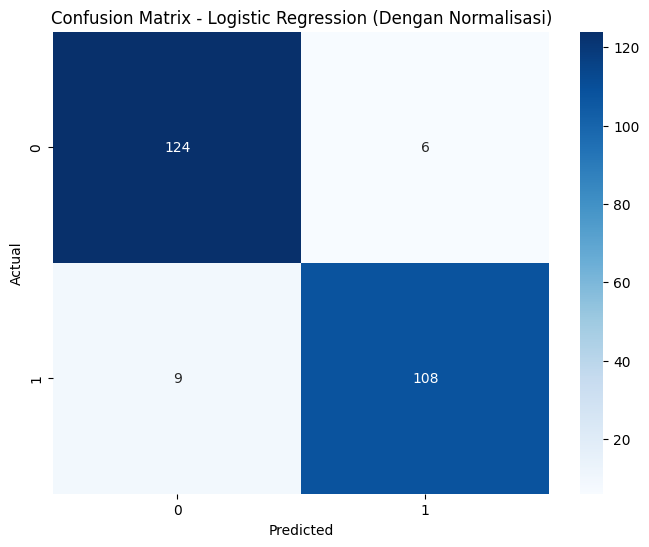

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Visualisasi Confusion Matrix untuk Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Dengan Normalisasi)")
plt.show()

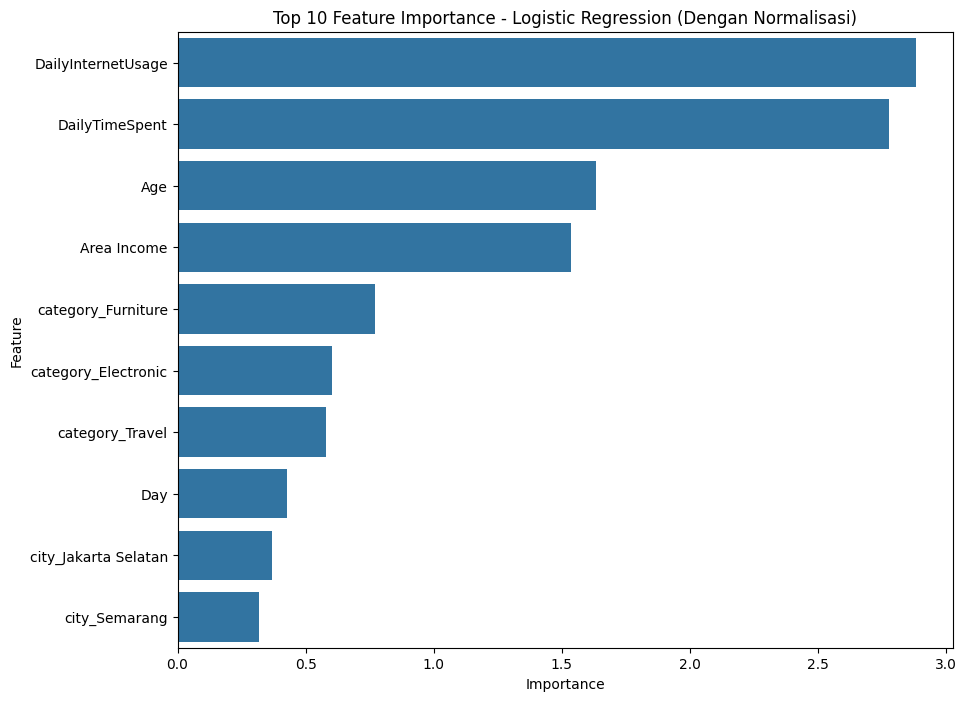

In [ ]:
# Feature Importance dari Logistic Regression
feature_importance_log_reg = np.abs(log_reg.coef_[0])
features = X_train.columns

# Buat DataFrame untuk mengurutkan feature importance
importance_df_log_reg = pd.DataFrame({'Feature': features, 'Importance': feature_importance_log_reg})
importance_df_log_reg = importance_df_log_reg.sort_values(by='Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_log_reg.head(10))
plt.title("Top 10 Feature Importance - Logistic Regression (Dengan Normalisasi)")
plt.show()